# Homework 2

### Due: Fri March. 27 @ 11:59pm

In this homework we will be performing model evaluation, model selection and feature selection in both a regression and classification setting.

The data we will be looking at are a small set of home sales data from as we might see on a real-estate website.


## Instructions

Follow the comments below and fill in the blanks (\_\_\_\_) to complete.

Please 'Restart and Run All' prior to submission.

Out of 50 points total.

## Part 0: Environment Setup

In [1]:
# 1. (2pts) Set up our environment with comman libraries and plotting.
#    Note: generally we would do all of our imports here but some imports
#    have been left till later where they are used.

# Import numpy as np, pandas as pd, and matplotlib.pylab as plt
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# Execute the matplotlib magic function to display plots inline
%matplotlib inline

# Setting a seed for numpy random
np.random.seed(123)

## Part 1: Regression

In Part 1 we will try to predict a real value home sale price using several models.

In [2]:
# 2. (3pts) Load and prepare our data.

# Read in the csv file house_sales_subset_normed.csv
df = pd.read_csv('../data/house_sales_subset.csv')

# Create a dataframe X which contains the first 5 columns:
#    'SqFtTotLiving_x1000', 'SqFtLot_x1000', 'SqFtDriveway_x1000', 'Bathrooms', 'Bedrooms'
X = df.iloc[:,:5]

# Create a series y_r which contains only the last column AdjSalePrice_x100000
#    Note: the '_r' here is denote the different targets for regression and classification
y_r = df.iloc[:,-1]

In [3]:
# 3. (3pts) Create a held-aside set

# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split into 80% train and 20% test using train_test_split 
#   Use random_state=42 for grading consistency
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X,
                                                 y_r,
                                                 test_size=.2, 
                                                 random_state=42)

# Print out the the length of y_test_r divided by the length y_r to confirm our test set size.
#    Only show 2 decimal places (eg: 0.11).
ts=len(y_test_r)/len(y_r)
print(f'test size calculated: {ts:0.2f}')

test size calculated: 0.20


### Part 1.1 Baseline Regressor

In [4]:
# 4. (3pts) Create a Dummy Regressior for baseline comparison

# Import the DummyRegressor model from sklearn 
from sklearn.dummy import DummyRegressor

# Instantiate a dummy model using strategy="median"
dummy_r = DummyRegressor(strategy="median")

# Train the dummy model on the training set created above
#   In the output we should see the Dummy Regressor medel settings
dummy_r.fit(X_train_r, y_train_r)

# Calculate and print the training set R2 score of fit dummy model.
dummy_r_training_r2 = dummy_r.score(X_train_r, y_train_r)
print('dummy training set R2: {:.2f}'.format(dummy_r_training_r2))

dummy training set R2: -0.06


In [5]:
# 5. (2pts) Use 5-fold Cross Validation to get a set of negative-MSE scores

# Import cross_val_score from sklearn.
from sklearn.model_selection import cross_val_score

# Generate 5-fold cross valication neg_mean_squared_error scores for the Dummy model on the training set.
#    Note that most sklearn models require a scoring function where larger is better (eg.for gradient ascent)
#    This is why cross_val_score uses 'neg_mean_squared_error' instead of 'mean_squared_error'.
dummy_r_cv=cross_val_score(dummy_r, X_train_r, y_train_r, cv=5,scoring='neg_mean_squared_error')
dummy_r_cv

array([-5.05363975, -4.28957165, -6.09214843, -6.16181789, -4.46183041])

In [6]:
# 6. (4pts) Write a function that takes in a set of negative-MSE scores 
#     and returns a tuple of "positive mean RMSE" and "2*standard deviation"

def negmse_to_rmse(negmse_cvscores):
    
     # Flip the cv scores from negative to positive
    mse_cvscores = -negmse_cvscores

    # Transform the cv scores from MSE to RMSE
    rmse_cvscores = np.sqrt(mse_cvscores)

    # Calculate the mean RMSE over rmse_cvscores
    rmse_mean = rmse_cvscores.mean()

    # Calculate 2 standard deviations of rmse_cvscores
    rmse_2std = 2*rmse_cvscores.std()
    
    return(rmse_mean,rmse_2std)

In [7]:
# 7. (2pts) Use our negmse_to_rmse function to calculate mean-RMSE 
#     and standard deviations for the dummy model.

# Pass dummy_r_negmse_cvscores to our function 
#   and capture the output as dummy_r_rmse and dummy_r_rmse_2std
dummy_r_rmse , dummy_r_rmse_2std = negmse_to_rmse(dummy_r_cv)

# Print out the mean RMSE and 2 standard variations for the dummy model
print('dummy mean cv RMSE: {:.2f} +- {:.2f}'.format(dummy_r_rmse,dummy_r_rmse_2std))

dummy mean cv RMSE: 2.28 +- 0.35


### Part 1.2 Linear Regression and Residuals

In [8]:
# 8. (4pts) Import the Linear Regression model and calculate average RMSE using 5-fold Cross Validation

# Import the LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression

# Generate 5-fold cv neg_mean_squared_error scores 
#   for the LinearRegression model with default settings
#   on the training set.
lr = LinearRegression()
lr_negmse_cvscores = cross_val_score(lr, X_train_r, y_train_r, cv=5,scoring='neg_mean_squared_error')

# Use the function we wrote above to get mean RMSE and 2 standard deviations scores for LinearRegression.
lr_rmse,lr_rmse_2std = negmse_to_rmse(lr_negmse_cvscores)

# Print out the mean RMSE and 2 standard variations for LinearRegression
print('lr mean cv RMSE: {:.2f} +- {:.2f}'.format(lr_rmse,lr_rmse_2std))

lr mean cv RMSE: 1.54 +- 0.20


Text(0, 0.5, 'residuals')

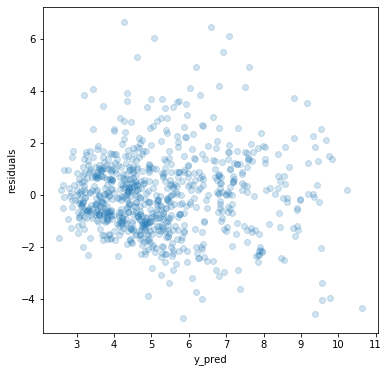

In [9]:
# 9. (4pts) Plot the residuals of a Linear Regression model

# Instantiate and retrain a linear regression model on the entire training set.
lr = lr.fit(X_train_r, y_train_r)

# Generate predictions y_pred, again using the training set.
y_pred = lr.predict(X_train_r)

# Calculate residuals
#    Recall: residual = y - y_pred
residuals = y_train_r - y_pred

# Plot predictions (x-axis) vs residuals (y-axis) using ax.scatter()
#    In scatter set alpha=0.2 to make the markers somewhat transparent.
#    Set axis/label names appropriately ('y_pred' and 'residuals')
# The residuals should appear fairly normal around 0 across the range of y_pred
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(y_pred,residuals,alpha=0.2)
plt.xlabel('y_pred'); plt.ylabel('residuals')

### Part 1.3 Evaluate on Test

In [10]:
# 10. (3pts) Evaluate performance of our LinearRegression model using test

# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Retrain our LinearRegression model lr on the entire training set
lr.fit(X_train_r, y_train_r)

# Calculate RMSE on the test set using the trained model
test_rmse = np.sqrt(mean_squared_error(y_test_r,lr.predict(X_test_r)))

print('test RMSE : {:.2f}'.format(test_rmse))

test RMSE : 1.74


---

## Part 2: Classification

Here we build a model to classify low vs. high adjusted sales price.

### Create Classification Target

In [11]:
# We'll create a binary target by thresholding at the median of our AdjSalePrice
#  High = 1, Low = 0
y_c = (df.AdjSalePrice_x100000 > df.AdjSalePrice_x100000.median()).astype(int)

### Part 2.1 Create a Held-Aside Aet

In [12]:
# 11. (1pts) Create a training and held aside set

# Split into 80% train and 20% test using train_test_split with random_state=42
#    Use the new y_c target and the same X we used for regression
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X,
                                                 y_c,
                                                 test_size=.2, 
                                                 random_state=42)

### Part 2.2 Measure baseline performance

In [13]:
# 12. (1pts) Instead of creating and training a Dummy Classifier, 
#    let's calculate accuracy if we just predict 1 for all training set items.

# Compare all y_train_c to a prediction of 1 and calculate the proportion correct.
baseline_acc = np.mean(y_train_c)

print('baseline accuracy: {:.2f}'.format(baseline_acc))

baseline accuracy: 0.51


### Part 2.3 Logistic Regression model

In [14]:
# 13. (4pts) Import, train and calculate 5-fold cv accuracy for a LogisticRegression model on the training set

# Import LogisticRegression model from sklearn
from sklearn.linear_model import LogisticRegression

# Get 5 fold cross-validation accuracy scores for a logistic regression model
#   using default settings, on the training set
#   Note: when instantianting, use solver='lbfgs' to remove warnings
logr_cvscores = cross_val_score(LogisticRegression(solver='lbfgs'), X_train_c, y_train_c, cv=5,scoring='accuracy')

# Calculate mean cv accuracy
logr_acc = logr_cvscores.mean()

# Calculate 2 standard deviations for the cv scores
logr_acc_2std = logr_cvscores.std()*2

print('logr mean cv accuracy: {:.2f} +- {:.2f}'.format(logr_acc,logr_acc_2std))

logr mean cv accuracy: 0.75 +- 0.06


### Part 2.4 RandomForests and Validation Curve

In [15]:
# 14. (5pts) Generate a validation curve over different tree depths in a Random Forest

# Import the RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Import the validation_curve function from sklearn.model_selection
from sklearn.model_selection import validation_curve

# In the RandomForestClassifier model, the depth of trees is set via max_depth
# Here we'll try the depths 3,5,10,20,30
depths = [3,5,10,20,30]

# Generate the train_scores and test_scores for max_depth at these different depths using validation_curve
#   Use a RandomForestClassifier() instance with default values
#   Use our training set X_train_c, y_train_c
#   Use 3-fold cross validation (reducing to 3 to speed things up)
#   Use accuracy as the scoring metric
train_scores,test_scores = validation_curve(RandomForestClassifier(n_estimators=100),X_train_c,
                                            y_train_c,param_name="max_depth",param_range=depths,cv=3,scoring="accuracy")

# train_scores and test_scores contain a matrix of values
#   For each depth (rows) there are 3 scores (columns), one for each fold
#   Take the mean across folds (columns) and store in mean_train_scores and mean_test_scores
mean_train_scores = train_scores.mean(axis=1)
mean_test_scores = test_scores.mean(axis=1)

# There should be five numbers in each list, each value between 0 and 1
print(mean_train_scores)
print(mean_test_scores)

[0.7706174  0.84749246 0.9824996  0.99625    0.99625   ]
[0.74751016 0.77126336 0.78249463 0.78624933 0.79249622]


Text(0, 0.5, 'accuracy')

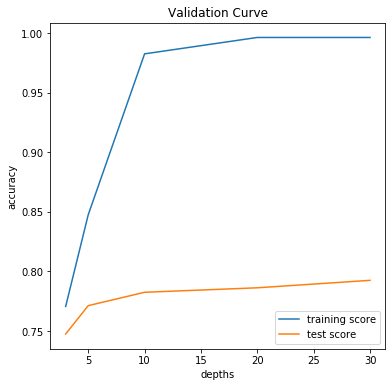

In [16]:
# 15. (4pts) Plot the validation curve

# Plot mean_train_scores and mean_test_scores on the same plot
#    use depths for the x values in each line
#    add a label to each line
#    add a legend
#    add a meaningful xlabel and ylabel
#    add a meaningful title
# Note: use as many lines as necessary
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.plot(depths,mean_train_scores,label="training score")
ax.plot(depths,mean_test_scores,label="test score")
plt.legend(); plt.title("Validation Curve")
plt.xlabel('depths'); plt.ylabel('accuracy')

### Part 2.5 RandomForests and Grid Search

In [17]:
# 16. (4pts) Perform 5-fold cross validated grid search over the number of trees and tree depth.

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the grid of parameters to test
#   The parameter settings to try are n_estimators = [10,50,100,200], max_depth = [3,5,10,20,30]
params = {'n_estimators' : [10,50,100,200], 'max_depth' : [3,5,10,20,30]}

# Instantiate and fit GridSearchCV on the classification training set
#   using 3-folds (for speed), the RandomForestClassifier and default scoring.
#   Make sure refit=True (default) so the model is retrained on the entire training set.
gscv_rf = GridSearchCV(RandomForestClassifier(),params,cv=3,refit=True).fit(X_train_c,y_train_c)

# Print out the best mean accuracy found and the best parameter setting found
print('rf best accuracy: {:.3f}'.format(gscv_rf.best_score_))
print('rf best params  : {}'.format(gscv_rf.best_params_))

# (to think about, don't need to answer)
#  Does this match what we might have guessed our max_depth should be from the validation plot above?
#  Why might it not?

rf best accuracy: 0.791
rf best params  : {'max_depth': 20, 'n_estimators': 200}


### Part 2.6 Evaluate on Test

In [18]:
# 17. (1pts) Evaluate our trained RandomForest model on the test set

# Calculate accuracy on the held aside test set using the random forest model in gscv_rf.
#   Note that we don't need to retrain on the full X_train_c,y_train_c as we used refit=True
test_acc = gscv_rf.score(X_test_c, y_test_c)

print('test acc : {:.2f}'.format(test_acc))

test acc : 0.81
